In [27]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('Fake Postings.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.03 seconds

Missing values: 0
Duplicated values: 0

Unique Values in Each Column:
title                639
description        10000
requirements         971
company_profile     9953
location             100
salary_range       10000
employment_type        5
industry               8
benefits               5
fraudulent             1
dtype: int64


In [29]:
df.head()

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent
0,Mental health nurse,Arm drive court sure vote. Earn $5000/week! Im...,"Basic knowledge in live, no degree required. F...",Rivera and Sons - Established 2022.,West Jeffrey,$55016-$100476,Internship,IT,Free meals,1
1,Conference centre manager,Government whom its bed go tax tree black. Ear...,"Basic knowledge in seek, no degree required. F...","Davidson, Jones and Gomez - Established 2003.",Lake Meredithberg,$53438-$93138,Part-Time,Finance,Flexible hours,1
2,"Engineer, land",I member discuss follow way there nation. Earn...,"Basic knowledge in worker, no degree required....",Allen Ltd - Established 1998.,Lake Cathybury,$45584-$105229,Part-Time,IT,Free travel,1
3,Forest/woodland manager,House across wait approach face. Earn $5000/we...,"Basic knowledge in example, no degree required...",Forbes Ltd - Established 1990.,South Matthewstad,$66188-$139621,Full-Time,Education,Free travel,1
4,"Production designer, theatre/television/film",Case best environmental full finally leader me...,"Basic knowledge in smile, no degree required. ...","Jennings, Martin and Sanchez - Established 1975.",East Rhondafurt,$32183-$115012,Temporary,Retail,Flexible hours,1


In [30]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()


print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['fraudulent']
Categorical Columns: ['title', 'description', 'requirements', 'company_profile', 'location', 'salary_range', 'employment_type', 'industry', 'benefits']


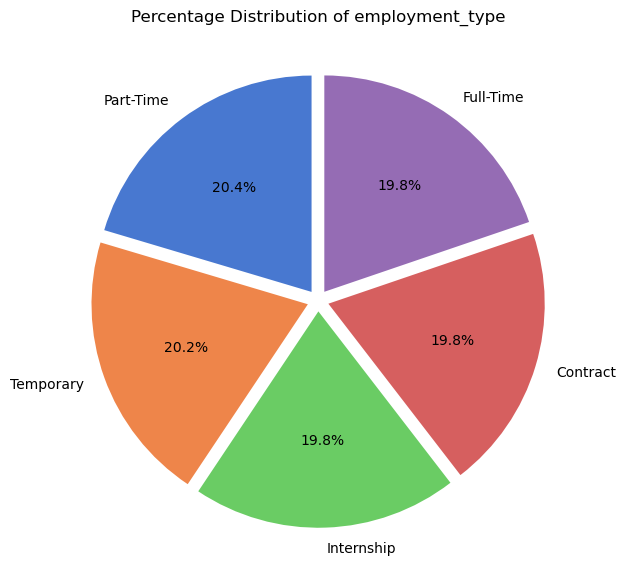

In [31]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(18, 6))  
    
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette), 
                               startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['employment_type']
plot_categorical_distributions(columns_to_plot)

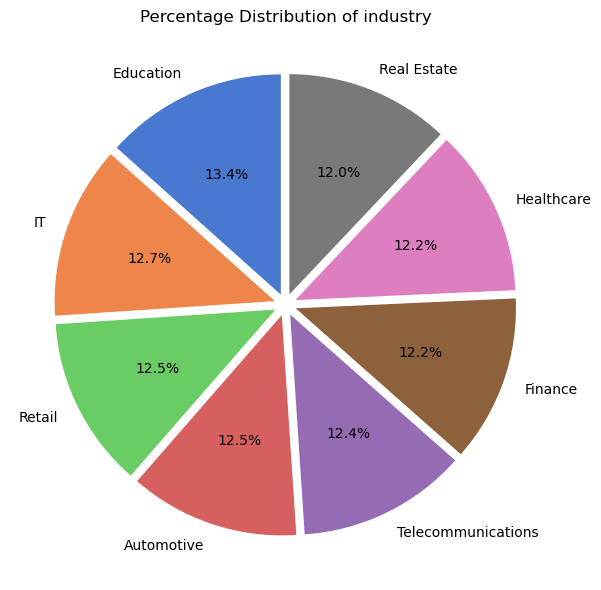

In [32]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(18, 6))  
    
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette), 
                               startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['industry']
plot_categorical_distributions(columns_to_plot)

In [33]:
df.fillna('Unknown', inplace=True)
df['fraudulent'] = df['fraudulent'].astype(int)

In [34]:
df['description_length'] = df['description'].apply(len)
df['num_requirements'] = df['requirements'].apply(lambda x: len(x.split(',')))

In [35]:
df['min_salary'] = df['salary_range'].str.replace('$', '').str.split('-').str[0].astype(float)
df['max_salary'] = df['salary_range'].str.replace('$', '').str.split('-').str[1].astype(float)

In [36]:
import re
df['Established'] = df['company_profile'].apply(lambda x: re.search(r'\b\d{4}\b', x).group() if re.search(r'\b\d{4}\b', x) else None)
df['Contact_Email'] = df['description'].apply(lambda x: re.search(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', x).group() if re.search(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', x) else None)

In [37]:
from sklearn.preprocessing import LabelEncoder
le_employment = LabelEncoder()
le_industry = LabelEncoder()

# แปลงข้อมูล
df['emcode'] = le_employment.fit_transform(df['employment_type'])
df['indcode'] = le_industry.fit_transform(df['industry'])

In [38]:
df = df.drop(columns=['location','title', 'description','requirements','salary_range','benefits','company_profile','employment_type','industry','Contact_Email'])

In [39]:
df.head()

,fraudulent,description_length,num_requirements,min_salary,max_salary,Established,emcode,indcode
0,1,95,2,55016.0,100476.0,2022,2,4
1,1,116,2,53438.0,93138.0,2003,3,2
2,1,115,2,45584.0,105229.0,1998,3,4
3,1,114,2,66188.0,139621.0,1990,1,1
4,1,118,2,32183.0,115012.0,1975,4,6


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select features and target

X = df.drop(columns=['fraudulent'])
y = df['fraudulent']

# Ensure there are at least two classes in the target variable
if len(y.unique()) < 2:
    print("The target variable 'fraudulent' must have at least two classes. Exiting...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

The target variable 'fraudulent' must have at least two classes. Exiting...


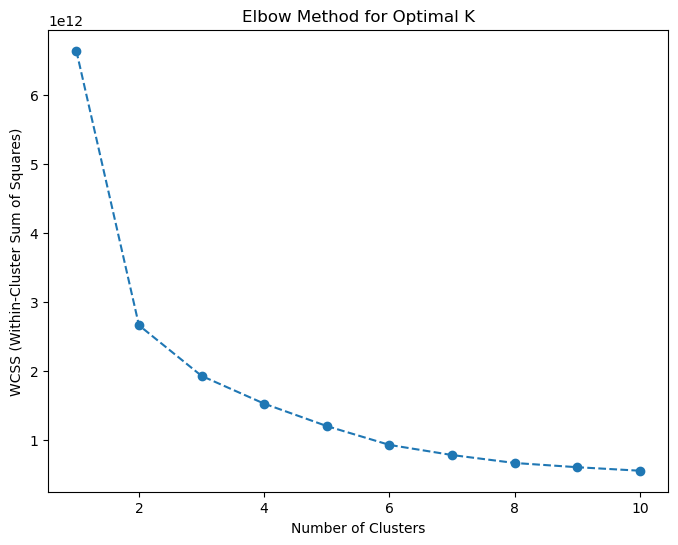

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []


for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


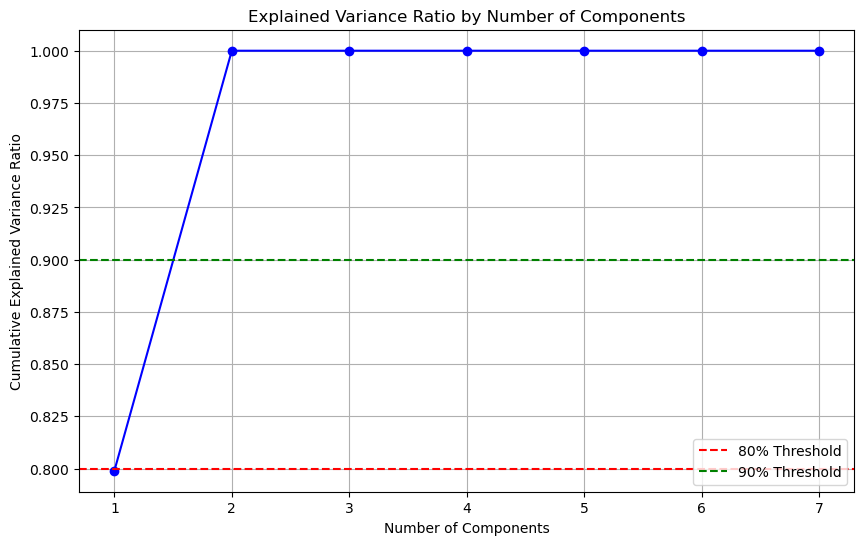

PC1: 79.89%
PC2: 20.11%
PC3: 0.00%
PC4: 0.00%
PC5: 0.00%
PC6: 0.00%
PC7: 0.00%

Components for 80% variance: 2
Components for 90% variance: 2


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA to your data
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
         cumulative_variance_ratio, 
         'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')

# Add horizontal lines for 80% and 90% thresholds
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Threshold')

plt.legend()
plt.grid(True)
plt.show()

# Print out detailed variance information
for i, ratio in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {ratio*100:.2f}%")

# Find number of components for 80% and 90% variance
components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1
components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print(f"\nComponents for 80% variance: {components_80}")
print(f"Components for 90% variance: {components_90}")

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_reduced)

KMeans(n_clusters=2)

In [45]:
y_kmeans = kmeans.predict(X_reduced)

In [46]:
df['Cluster'] = y_kmeans

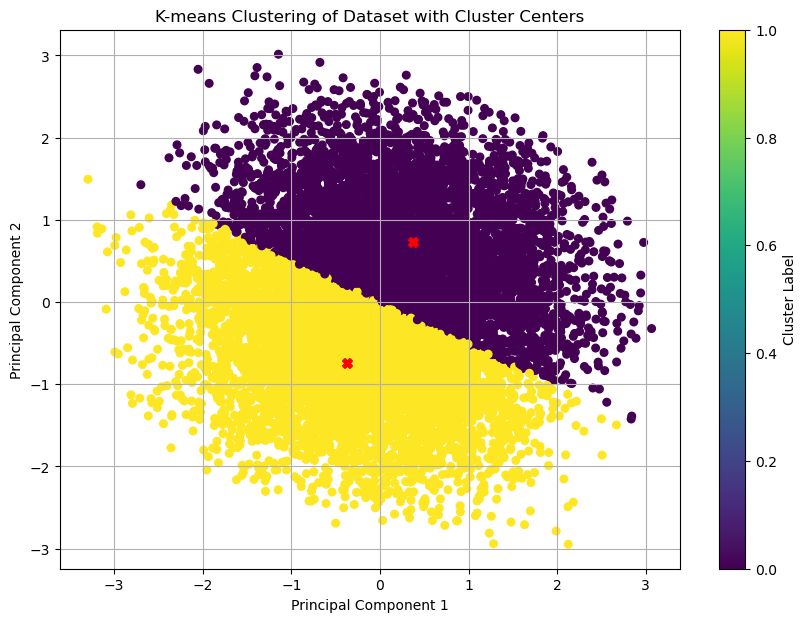

In [47]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', marker='X')
plt.title('K-means Clustering of Dataset with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

In [48]:
df.head()

,fraudulent,description_length,num_requirements,min_salary,max_salary,Established,emcode,indcode,Cluster
0,1,95,2,55016.0,100476.0,2022,2,4,0
1,1,116,2,53438.0,93138.0,2003,3,2,1
2,1,115,2,45584.0,105229.0,1998,3,4,1
3,1,114,2,66188.0,139621.0,1990,1,1,0
4,1,118,2,32183.0,115012.0,1975,4,6,0
